# INTRODUCTION
## This data set is all about olymic games conducted from year 2000 to 2012 with all the details of player like his name, age, country wehe he belongs to the year of participation what kind of medals a player won and the total number of medals including gold,silver,bronze.

In [1]:
import numpy as np #importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Q1. Please do the basic exploration of the data. 

In [2]:
raw_df = pd.read_csv('C:\\Users\\Shubham\\Desktop\\hw\\capstone\\olympix_data.csv',parse_dates=True)
#reading the data with help of pandas

In [3]:
raw_df.head() #to see the head of data

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6


In [4]:
raw_df.info() #showing data with its datatype is it correct or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8618 non-null   object 
 3   year          8618 non-null   int64  
 4   Date_Given    8618 non-null   object 
 5   sports        8618 non-null   object 
 6   gold_medal    8618 non-null   int64  
 7   silver_medal  8618 non-null   int64  
 8   brone_medal   8618 non-null   int64  
 9   total_medal   8618 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 673.4+ KB


## observation:
### date_given column is not in correct format we have to make it this data in date format

In [5]:
raw_df.columns #to see the names of columns

Index(['name', 'age', 'country', 'year', 'Date_Given', 'sports', 'gold_medal',
       'silver_medal', 'brone_medal', 'total_medal'],
      dtype='object')

In [6]:
raw_df['Date_Given'] = pd.to_datetime(raw_df['Date_Given']) #to convert it as a correct data type

In [7]:
raw_df.info() #showing data with its datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          8613 non-null   object        
 1   age           8613 non-null   float64       
 2   country       8618 non-null   object        
 3   year          8618 non-null   int64         
 4   Date_Given    8618 non-null   datetime64[ns]
 5   sports        8618 non-null   object        
 6   gold_medal    8618 non-null   int64         
 7   silver_medal  8618 non-null   int64         
 8   brone_medal   8618 non-null   int64         
 9   total_medal   8618 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 673.4+ KB


In [8]:
raw_df.shape #to see rows and columns

(8618, 10)

## Q3. Duplicates in the dataset introduces bias in the study. Please check and perform appropriate steps.

In [9]:
## NOTE Q2. IS DONE BELOW

In [10]:
raw_df.duplicated().sum() #To see all duplicated values

3

In [11]:
raw_df = raw_df.drop_duplicates() #to drop duplicate values in order to clean our dataset

In [12]:
raw_df.shape

(8615, 10)

## Q2. Deal with missing values appropriately. You can either remove them or fill them, but a proper justification is required.

In [13]:
raw_df.isnull().sum() #to check null values in a dataset

name            2
age             2
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

In [14]:
raw_df[raw_df['name'].isnull()] # to find which rows has null values

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
1428,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1
4485,NaN,NaN,Argentina,2012,2012-08-12,Hockey,0,1,0,1


In [15]:
2/8615      #checking the percentage of data these null row has from total dataset
            ## as only 2 rows of the data is missing which is less than 0.0002% we can drop those two rows

0.00023215322112594313

#### Justification : 2 rows of the data is missing which is less than 0.0002% we can drop those two rows


In [16]:
df = raw_df.dropna() #to drop the data

In [17]:
df.shape

(8613, 10)

In [18]:
df.isnull().sum() # finally cheking null values

name            0
age             0
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

In [19]:
df.info() #completely clean data with correct datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8613 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          8613 non-null   object        
 1   age           8613 non-null   float64       
 2   country       8613 non-null   object        
 3   year          8613 non-null   int64         
 4   Date_Given    8613 non-null   datetime64[ns]
 5   sports        8613 non-null   object        
 6   gold_medal    8613 non-null   int64         
 7   silver_medal  8613 non-null   int64         
 8   brone_medal   8613 non-null   int64         
 9   total_medal   8613 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 740.2+ KB


In [20]:
df.sample(10) #sample of few random data

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
4874,William Accambray,24.0,France,2012,2012-08-12,Handball,1,0,0,1
3786,Vera Shimanskaya,19.0,Russia,2000,2000-10-01,Rhythmic Gymnastics,1,0,0,1
1181,Aleksa Šaponjic,20.0,Serbia,2012,2012-08-12,Waterpolo,0,0,1,1
4420,Igor Kravchuk,35.0,Russia,2002,2002-02-24,Ice Hockey,0,0,1,1
165,Zhang Yining,26.0,China,2008,2008-08-24,Table Tennis,2,0,0,2
331,Roar Ljøkelsøy,29.0,Norway,2006,2006-02-26,Ski Jumping,0,0,2,2
659,Deon Hemmings,31.0,Jamaica,2000,2000-10-01,Athletics,0,2,0,2
4710,Nathan Eglington,23.0,Australia,2004,2004-08-29,Hockey,1,0,0,1
2852,Andrea Benelli,44.0,Italy,2004,2004-08-29,Shooting,1,0,0,1
2529,Cindy Klassen,22.0,Canada,2002,2002-02-24,Speed Skating,0,0,1,1


## Q4. Please remove special characters from the name column.

In [21]:
# removing special char from name
import re #importing regex

In [22]:
df['name'] = df['name'].str.replace(r'[^a-z A-Z]', '') #filtering out all special characte

C:\Users\Shubham\AppData\Local\Temp/ipykernel_9664/376374281.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df['name'].str.replace(r'[^a-z A-Z]', '') #filtering out all special characte
C:\Users\Shubham\AppData\Local\Temp/ipykernel_9664/376374281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = df['name'].str.replace(r'[^a-z A-Z]', '') #filtering out all special characte


In [23]:
df['name'] #showing data after filteration

0            Michael Phelps
1            Michael Phelps
2            Michael Phelps
3          Natalie Coughlin
4             Aleksey Nemov
               ...         
8613       Olena Sadovnycha
8614       Kateryna Serdiuk
8615       Wietse van Alten
8616    Sandra WagnerSachse
8617              Rod White
Name: name, Length: 8613, dtype: object

#### NOTE: After filtration and cleaning of the data i have saved the cleaned data into csv file to use this file in spark and sql 

In [24]:
#df.to_csv('clean_olympic_data.csv', index=False)

## Q5. Perform data visualization techniques to appropriate columns and explain them.

In [25]:
df.columns

Index(['name', 'age', 'country', 'year', 'Date_Given', 'sports', 'gold_medal',
       'silver_medal', 'brone_medal', 'total_medal'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8613 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          8613 non-null   object        
 1   age           8613 non-null   float64       
 2   country       8613 non-null   object        
 3   year          8613 non-null   int64         
 4   Date_Given    8613 non-null   datetime64[ns]
 5   sports        8613 non-null   object        
 6   gold_medal    8613 non-null   int64         
 7   silver_medal  8613 non-null   int64         
 8   brone_medal   8613 non-null   int64         
 9   total_medal   8613 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 740.2+ KB


#### first we can derive some visual conclustion on some relation data visualization with appropriate column
#### Here we are showing relation with NUMBER OF TOTAL MEDALS AND TYPE OF MEDALS COUNTRY WISE OF TOP 10 COUNTRIES

In [27]:
country_medal = df[['country','gold_medal','silver_medal','brone_medal','total_medal']]
#segregating the required columns
country_medal = country_medal.groupby(['country'], as_index=True)[['gold_medal','silver_medal','brone_medal','total_medal']].sum().sort_values('total_medal',ascending=False)
# grouping by country to have countrywise output
country_medal

,gold_medal,silver_medal,brone_medal,total_medal
country,,,,
United States,552,440,320,1312
Russia,234,221,313,768
Germany,223,183,223,629
Australia,163,226,220,609
China,234,156,140,530
...,...,...,...,...
Guatemala,0,1,0,1
Syria,0,0,1,1
Macedonia,0,0,1,1


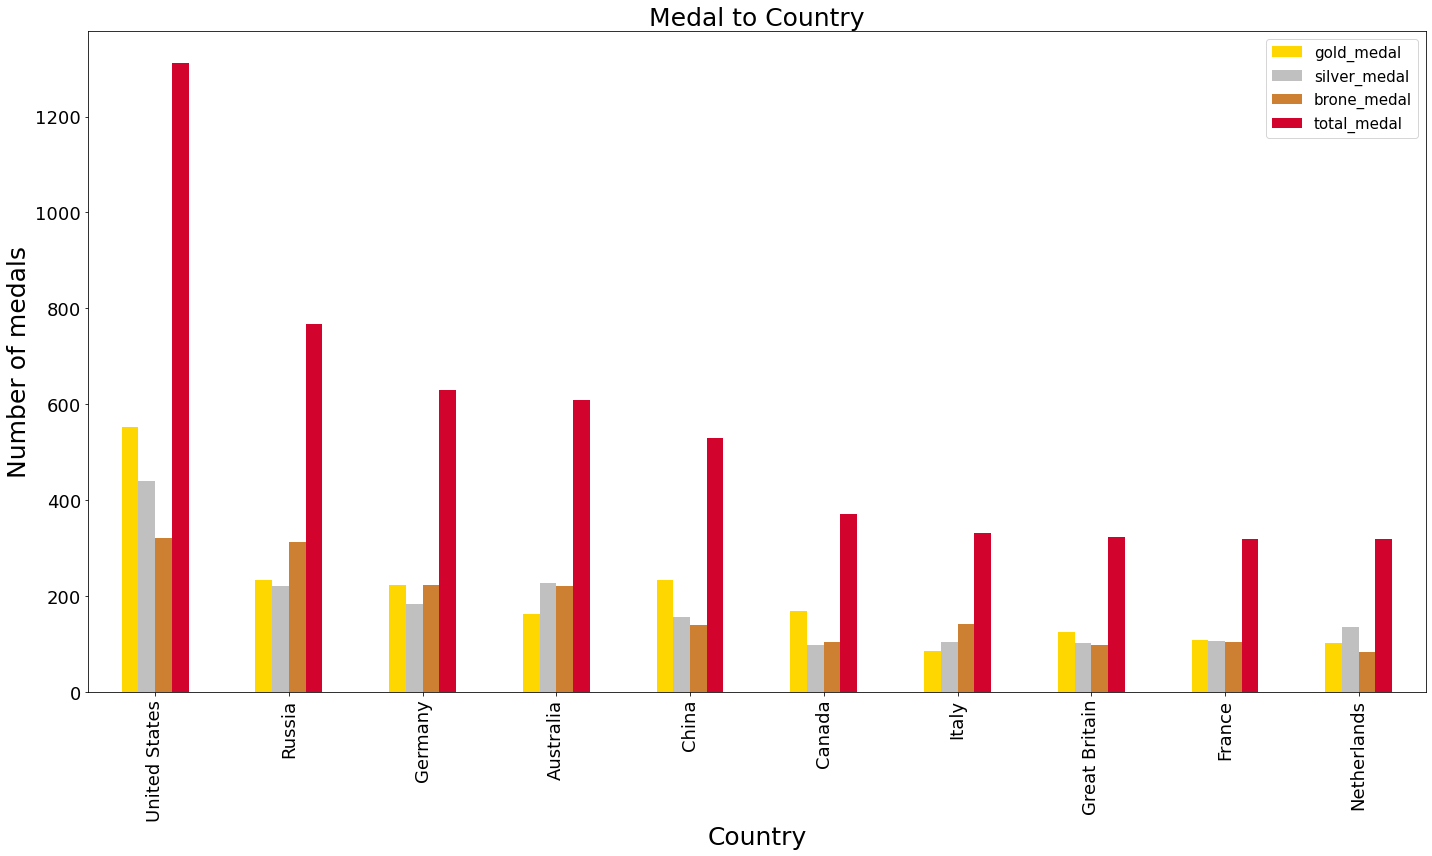

In [28]:
#showing top 10 the data country wise and types of medals with total medal

color_lst = ['#FFD700','#C0C0C0','#CD7F32','#D2042D'] #using customised colors
graph1 = country_medal[:10].plot(kind='bar' ,figsize=(20,12), color=color_lst,fontsize=18) #top 10 selection
graph1.set_xlabel('Country', fontsize=25) #increasing font size
graph1.set_ylabel('Number of medals', fontsize=25) #increasing font size
graph1.set_title('Medal to Country',fontsize=25) #increasing font size
graph1.legend(fontsize=15) #increasing font size
plt.tight_layout()

In [29]:
## Here we are showing relation with NUMBER OF TOTAL MEDALS AND TYPE OF MEDALS SPORT WISE OF TOP 10 COUNTRIES

sports_medal = df[['sports','gold_medal','silver_medal','brone_medal','total_medal']]
#segregating the required columns
sports_medal = sports_medal.groupby(['sports'], as_index=True)[['gold_medal','silver_medal','brone_medal','total_medal']].sum().sort_values('total_medal',ascending=False)
# grouping by sports and then sorting the data in decending order
sports_medal[:10]
#top 10 results

,gold_medal,silver_medal,brone_medal,total_medal
sports,,,,
Swimming,270,257,238,765
Athletics,253,257,243,753
Rowing,192,192,192,576
Football,136,134,137,407
Hockey,129,128,129,386
Ice Hockey,129,129,126,384
Handball,118,116,117,351
Canoeing,111,111,111,333
Waterpolo,102,101,103,306


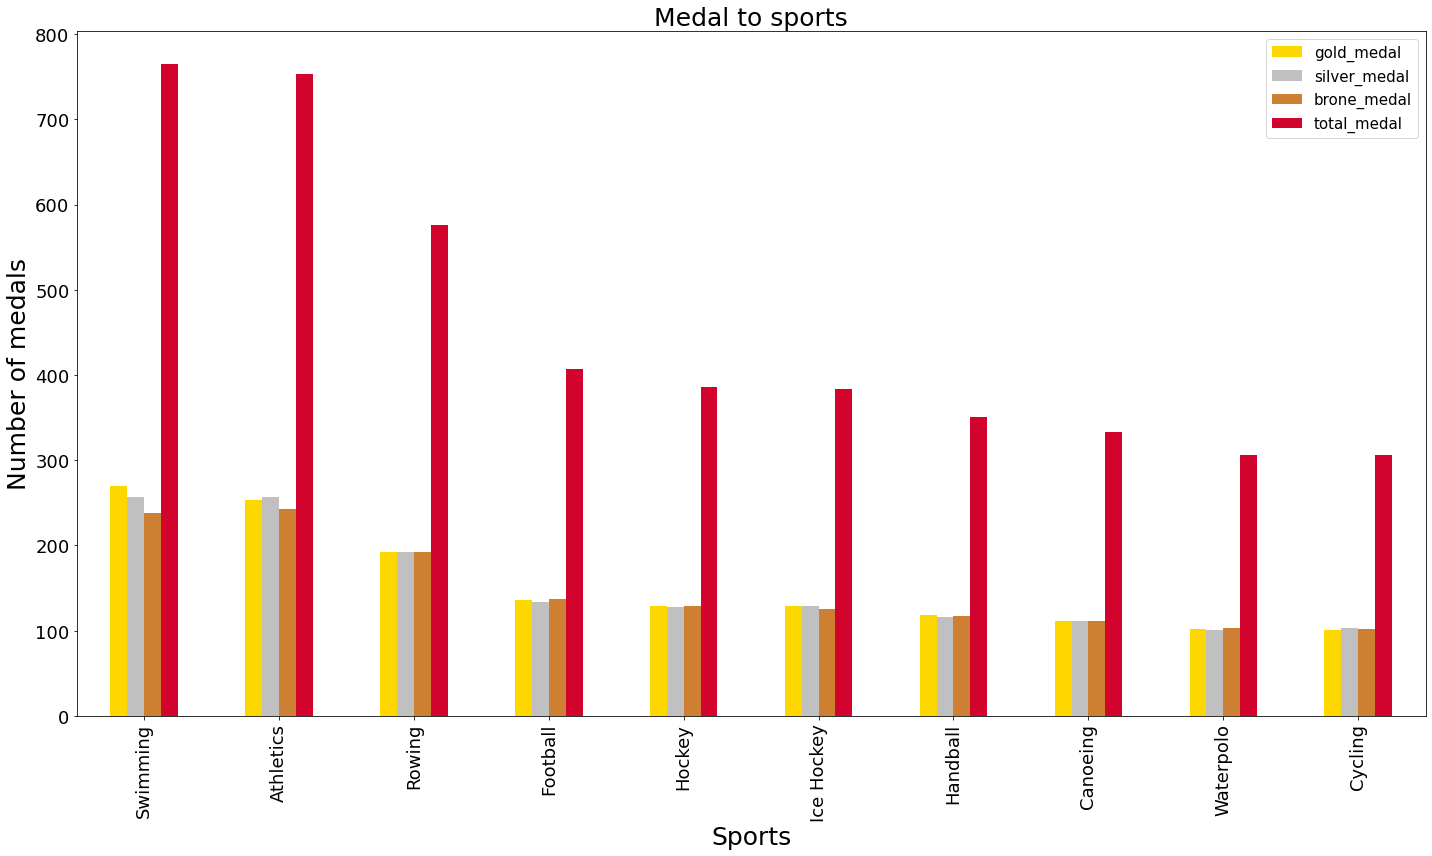

In [30]:
color_lst = ['#FFD700','#C0C0C0','#CD7F32','#D2042D'] #using customised colors
graph1 = sports_medal[:10].plot(kind='bar' ,figsize=(20,12), color=color_lst,fontsize=18) #increasing font size
graph1.set_xlabel('Sports', fontsize=25) #increasing font size
graph1.set_ylabel('Number of medals', fontsize=25) #increasing font size
graph1.set_title('Medal to sports',fontsize=25) #increasing font size
graph1.legend(fontsize=15) #increasing font size
plt.tight_layout()

In [31]:
## Here we are showing relation with NUMBER OF TOTAL MEDALS AND TYPE OF MEDALS ATHELETE WISE OF TOP 10 COUNTRIES

athelete_medal = df[['name','gold_medal','silver_medal','brone_medal','total_medal']] 
#segregating the required columns
athelete_medal = athelete_medal.groupby(['name'], as_index=True)[['gold_medal','silver_medal','brone_medal','total_medal']].sum().sort_values('total_medal',ascending=False)
# grouping by sports and then sorting the data in decending order
athelete_medal[:10] #showing top 10 result

,gold_medal,silver_medal,brone_medal,total_medal
name,,,,
Michael Phelps,18,2,2,22
Natalie Coughlin,3,4,5,12
Ryan Lochte,5,3,3,11
Ole Einar Bjrndalen,5,3,1,9
Leisel Jones,3,5,1,9
Ian Thorpe,5,3,1,9
Inge de Bruijn,4,2,2,8
Katalin Kovcs,3,5,0,8
Apolo Anton Ohno,2,2,4,8


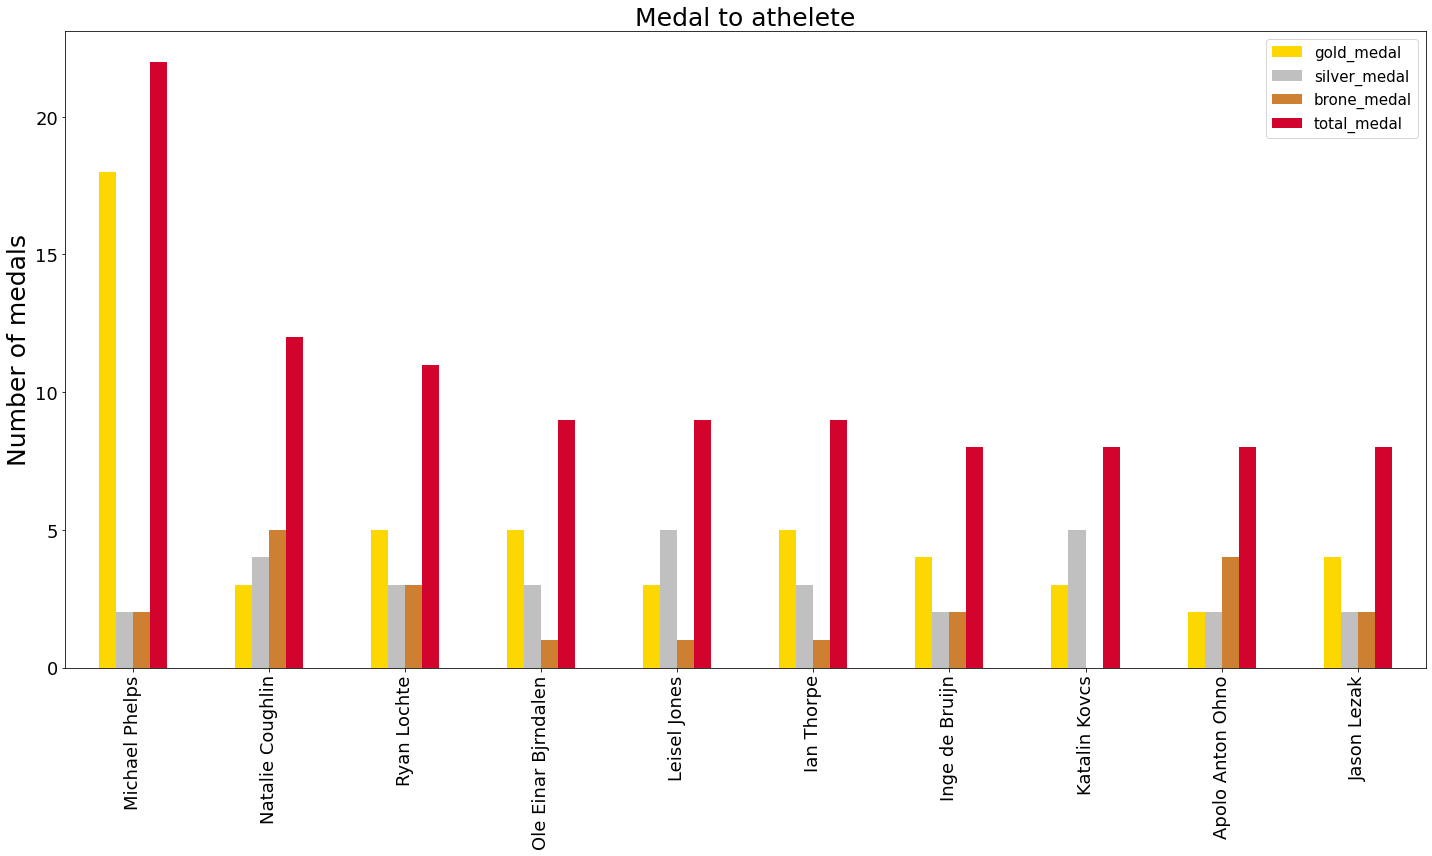

In [32]:
color_lst = ['#FFD700','#C0C0C0','#CD7F32','#D2042D']  #using customised colors
graph1 = athelete_medal[:10].plot(kind='bar' ,figsize=(20,12), color=color_lst, fontsize=18) #top 10 results
graph1.set_xlabel('', fontsize=25) #increasing font size
graph1.set_ylabel('Number of medals', fontsize=25) #increasing font size
graph1.set_title('Medal to athelete',fontsize=25) #increasing font size
graph1.legend(fontsize=15)  #increasing font size
plt.tight_layout()

<AxesSubplot:xlabel='age', ylabel='Count'>

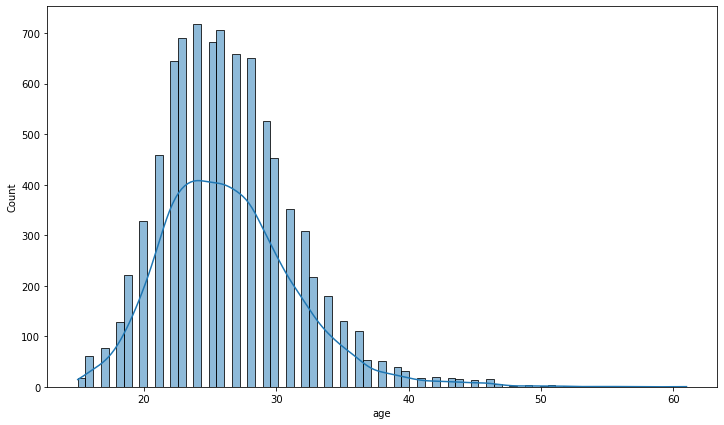

In [33]:
#distribution of age
plt.figure(figsize=(12,7))
sns.histplot(df['age'], kde=True)

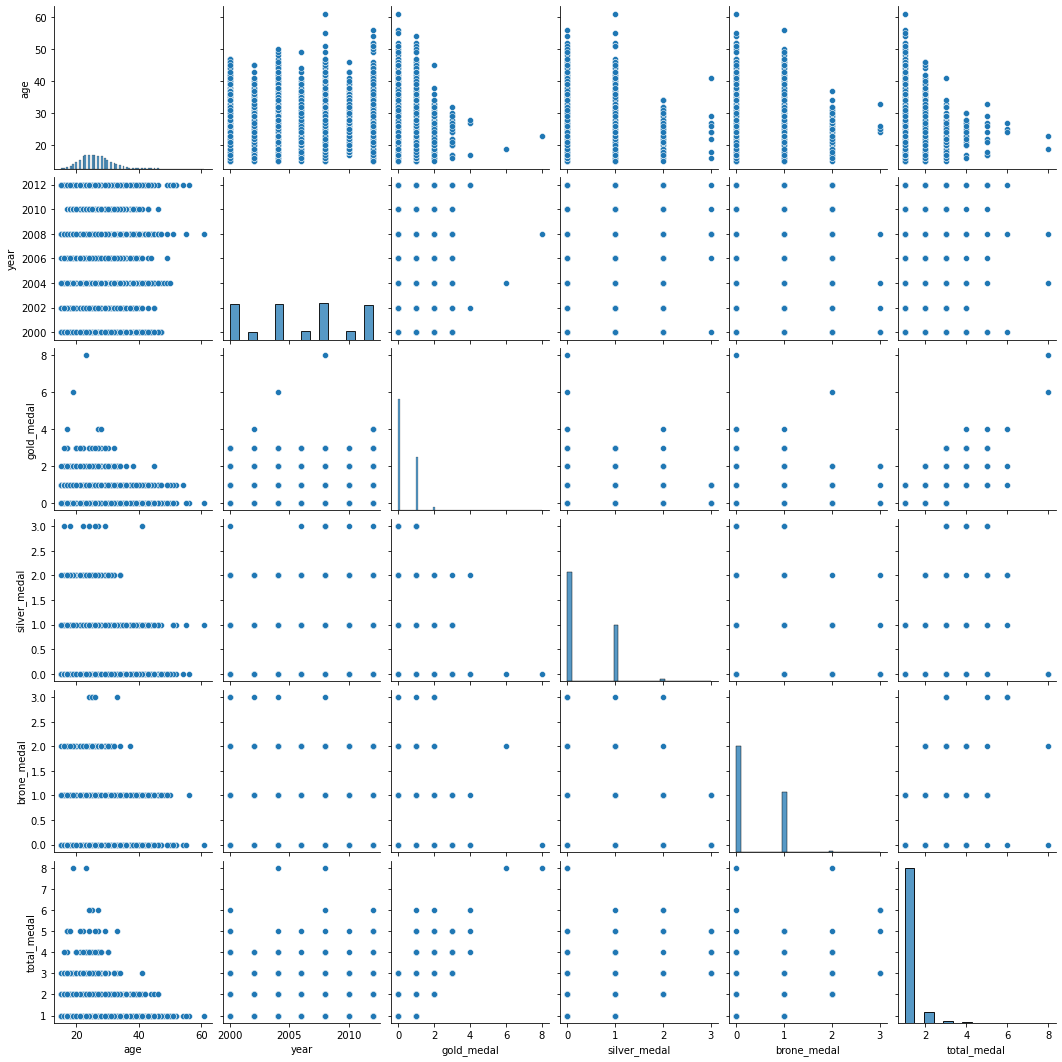

In [34]:
sns.pairplot(df) #to corelate all numerical column

## Q6. Please check if the age dataset is skewed or symmetric. Based on results perform transformation.

#### In order to see the graph is skewed or symmetic we can use hist plot along with kde to see skewness of the age column

<AxesSubplot:xlabel='age', ylabel='Count'>

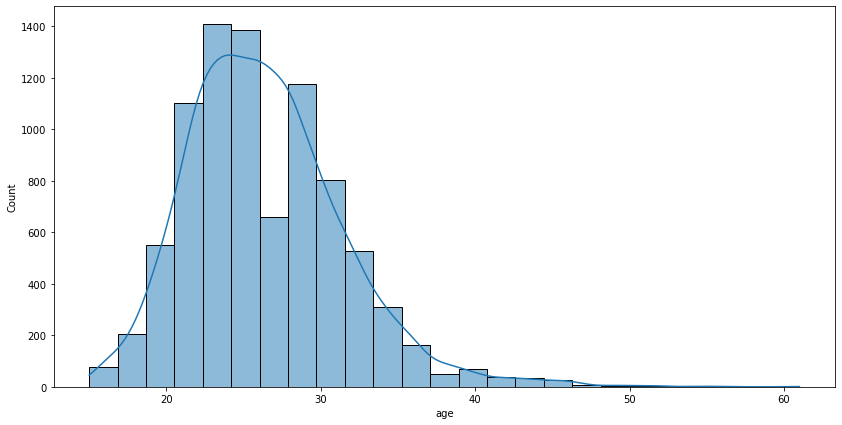

In [35]:
plt.figure(figsize=(14,7))
sns.histplot(data=df, x='age', kde=True, bins=25)

### Observation:
#### we can see the data is skewed towards right so we can check for outliers , too see that visualy we habe box plot and to calculate it we can use 5 point and calculate IQR according to our requirement in order to make distribution more symetric.

<AxesSubplot:xlabel='age'>

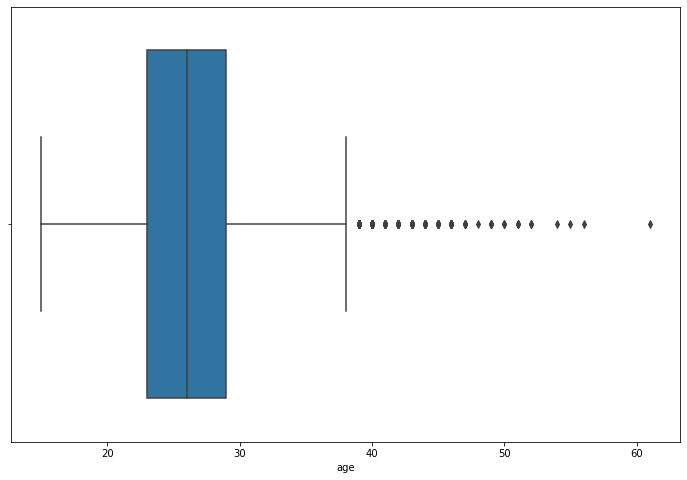

In [36]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='age') #using box plot to show outliers visually.

In [37]:
df['age'].describe() #checking out five point summary(min,max,25%,50%,75%)

count    8613.000000
mean       26.405434
std         5.102118
min        15.000000
25%        23.000000
50%        26.000000
75%        29.000000
max        61.000000
Name: age, dtype: float64

In [38]:
percentile75 = df['age'].quantile(.75) #to calculate 75%
percentile25 = df['age'].quantile(.25) #to calculate 25%
print(percentile75,percentile25 ) 

29.0 23.0


In [39]:
IQR = percentile75 - percentile25
IQR

6.0

In [40]:
upper_whisker = percentile75 + (1.5*IQR) #calculating upper whisker FORMULA FOR UPPER WHISKER = pecentile75 + 1.5 X IQR
upper_whisker

38.0

In [41]:
lower_whisker = percentile25 - (1.5*IQR) # calculating lower whisker FORMULA FOR UPPER WHISKER = pecentile25 - 1.5 X IQR
lower_whisker

14.0

In [42]:
# removing outliers above the upper whisker to make a graph symetric

In [43]:
out_lier_data = df[df['age'] > upper_whisker] #showing out outliers
out_lier_data

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
64,Dara Torres,41.0,United States,2008,2008-08-24,Swimming,0,3,0,3
438,Heike Kemmer,46.0,Germany,2008,2008-08-24,Equestrian,1,0,1,2
439,Eric Lamaze,40.0,Canada,2008,2008-08-24,Equestrian,1,1,0,2
440,Beezie Madden,44.0,United States,2008,2008-08-24,Equestrian,1,0,1,2
441,Hinrich Romeike,45.0,Germany,2008,2008-08-24,Equestrian,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...
8569,Ilario Di Bu,51.0,Italy,2008,2008-08-24,Archery,0,1,0,1
8598,Hiroshi Yamamoto,41.0,Japan,2004,2004-08-29,Archery,0,1,0,1
8604,Ilario Di Bu,43.0,Italy,2000,2000-10-01,Archery,0,1,0,1
8608,Butch Johnson,45.0,United States,2000,2000-10-01,Archery,0,0,1,1


In [44]:
transformed_df = df[df['age'] < upper_whisker] # FILTERING out outliers

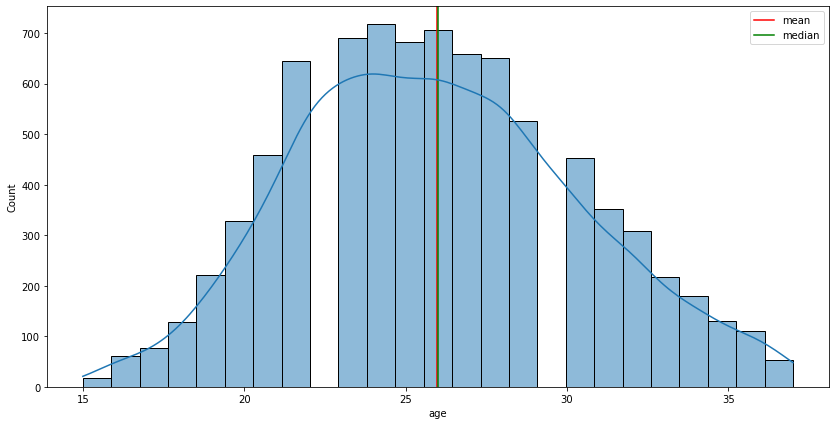

In [45]:
plt.figure(figsize=(14,7)) #to enlarge the graph
plt.axvline(transformed_df['age'].mean(), color = 'red', label='mean') #to mark mean line
plt.axvline(transformed_df['age'].median(), color = 'green',label='median') #to mark median line
sns.histplot(data=transformed_df, x='age', kde=True, bins=25) #to plot 
plt.legend() #to show legend

In [46]:
## now data is normally distributed AS MEAN AND MEDIAN ALMOST OVERLAPS

## Q7. Please perform appropriate numerical measures on each column and report them accordingly.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8613 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          8613 non-null   object        
 1   age           8613 non-null   float64       
 2   country       8613 non-null   object        
 3   year          8613 non-null   int64         
 4   Date_Given    8613 non-null   datetime64[ns]
 5   sports        8613 non-null   object        
 6   gold_medal    8613 non-null   int64         
 7   silver_medal  8613 non-null   int64         
 8   brone_medal   8613 non-null   int64         
 9   total_medal   8613 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 998.2+ KB


In [48]:
df.columns

Index(['name', 'age', 'country', 'year', 'Date_Given', 'sports', 'gold_medal',
       'silver_medal', 'brone_medal', 'total_medal'],
      dtype='object')

In [49]:
df['name'].mode() # as it is a categorical column mode is suitable measure for this data type

0          Anky van Grunsven
1             Artur Taymazov
2                Ben Ainslie
3            Bradley Wiggins
4               Brenda Villa
5                  Chris Hoy
6     Christie PearceRampone
7             Emilie Heymans
8             Eskild Ebbesen
9              Heather Petri
10               Jason Lezak
11             Katalin Kovcs
12        Katherine Grainger
13     Katrin WagnerAugustin
14                 Kim Rhode
15           Kristi Harrower
16            Lauren Jackson
17              Leisel Jones
18               Lucha Aymar
19                Matt Wells
20            Michal Martikn
21        Pavol Hochschorner
22        Peter Hochschorner
23            Robert Scheidt
24          Sergey Tetyukhin
25         Valentina Vezzali
26    Veronica CampbellBrown
27                  Wang Hao
28                  Yang Wei
dtype: object

<AxesSubplot:xlabel='age', ylabel='Count'>

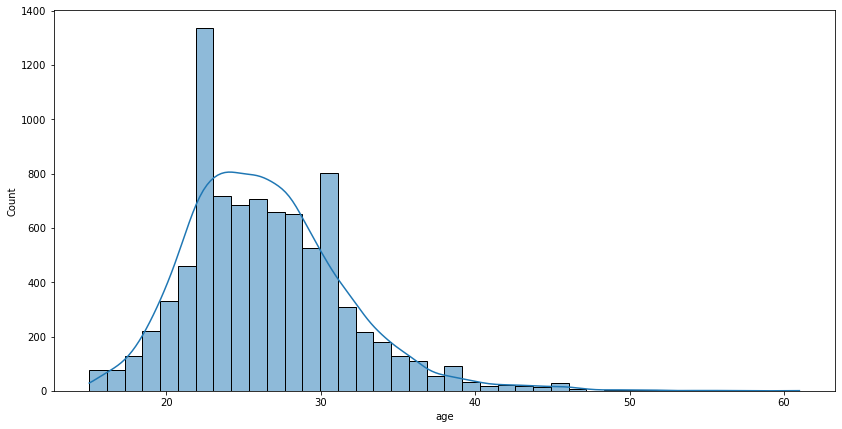

In [50]:
plt.figure(figsize=(14,7))
sns.histplot(data=df, x='age', kde=True, bins=40)

In [51]:
df['age'].median() # as above seen data is skewed so median is a good measure for this column 
                   #  as median is not much affected with outlier data

26.0

In [52]:
df['country'].mode() # as it is a categorical column mode is suitable measure for this data type

0    United States
dtype: object

In [53]:
df['year'].mode() # though it appers to be numerical column but it is a categorical feature so mode is suitable for this data type.

0    2008
dtype: int64

In [54]:
df['sports'].mode() # as it is a categorical column mode is suitable measure for this data type

0    Athletics
dtype: object

In [55]:
df['gold_medal'].min() #as a medal data is descrete and min and max is suitable measure for this data type

0

In [56]:
df['gold_medal'].max() #as a medal data is descrete and min and max is suitable measure for this data type

8

In [57]:
df['silver_medal'].min() #as a medal data is descrete and min and max is suitable measure for this data type

0

In [58]:
df['silver_medal'].max() #as a medal data is descrete and min and max is suitable measure for this data type

3

In [59]:
df['brone_medal'].min() #as a medal data is descrete and min and max is suitable measure for this data type

0

In [60]:
df['brone_medal'].max() #as a medal data is descrete and min and max is suitable measure for this data type

3

In [61]:
df['total_medal'].min() #as a medal data is descrete and min and max is suitable measure for this data type

1

In [62]:
df['total_medal'].max() #as a medal data is descrete and min and max is suitable measure for this data type

8

## Q8. Please list the top 10 countries with the gold medal, then top10 countries with the silver medal, then bronze medal and the total medal.

In [63]:
gold_medal = pd.DataFrame(df.groupby(['country'])['gold_medal'].sum()) #grouping the data country wise and adding there gold medals
gold_medal.sort_values('gold_medal', ascending=False) #sorting the result in decending order

,gold_medal
country,
United States,552
Russia,234
China,234
Germany,223
Canada,168
...,...
Montenegro,0
Paraguay,0
Puerto Rico,0


In [64]:
silver_medal = pd.DataFrame(df.groupby(['country'])['silver_medal'].sum()) #grouping the data country wise and adding there gold medals
silver_medal.sort_values('silver_medal', ascending=False) #sorting the result in decending order

,silver_medal
country,
United States,440
Australia,226
Russia,221
Germany,183
China,156
...,...
Costa Rica,0
Cameroon,0
Barbados,0


In [65]:
bronze_medal = pd.DataFrame(df.groupby(['country'])['brone_medal'].sum()) #grouping the data country wise and adding there bronze medals
bronze_medal.sort_values('brone_medal', ascending=False) #sorting the result in decending order

,brone_medal
country,
United States,320
Russia,313
Germany,223
Australia,220
Italy,142
...,...
Sri Lanka,0
Dominican Republic,0
Ecuador,0


In [66]:
total_medal = pd.DataFrame(df.groupby(['country'])['total_medal'].sum())
total_medal.sort_values('total_medal', ascending=False)

,total_medal
country,
United States,1312
Russia,768
Germany,629
Australia,609
China,530
...,...
Guatemala,1
Syria,1
Macedonia,1
